In [162]:
# !bash push.sh

Already up to date.
[master 8c17489] Notebook updated.
 1 file changed, 77 insertions(+), 45 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 3.11 KiB | 795.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/rachitsaksena/Multilingual-Agression-Classification
   eebf9ac..8c17489  master -> master


In [209]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from googletrans import Translator

import spacy
nlp = spacy.load('en_core_web_sm')

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re
tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True)

In [3]:
eng_train = pd.read_csv('Data/trac2_eng_train.csv')
eng_train.sample(5)

,ID,Text,Sub-task A,Sub-task B
4062,C33.497,Fuck off... Don't u day dare spread homophobia...,OAG,GEN
3259,C10.314,If she is residing abroad and flying in specif...,NAG,NGEN
931,C63.49,gooct,NAG,NGEN
3040,C33.509,I Proud of my self i am Lesbian 🏳️‍🌈,NAG,NGEN
1355,C7.503,Perfect perfect perfect answer for those m.......,OAG,GEN


In [4]:
eng_train.info() # no null enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 4 columns):
ID            4263 non-null object
Text          4263 non-null object
Sub-task A    4263 non-null object
Sub-task B    4263 non-null object
dtypes: object(4)
memory usage: 133.3+ KB


In [5]:
eng_train.iloc[28].Text, eng_train.iloc[28]['Sub-task A'] 

('feminism means equality not discrimination first you should learn about this\ngo and study about feminism.',
 'OAG')

In [6]:
eng_train[eng_train['Sub-task A'] == 'NAG'].sample(5)

,ID,Text,Sub-task A,Sub-task B
2832,C59.498,Thanks brother,NAG,NGEN
3192,C9.325.1,I know,NAG,NGEN
3875,C10.552,"""Intellectual standard of the one book wonder ...",NAG,NGEN
840,C7.776,Totally Agree with you sir 👌,NAG,NGEN
127,C59.1681,"Bro, Nice video",NAG,NGEN


NAG    3375
CAG     453
OAG     435
Name: Sub-task A, dtype: int64

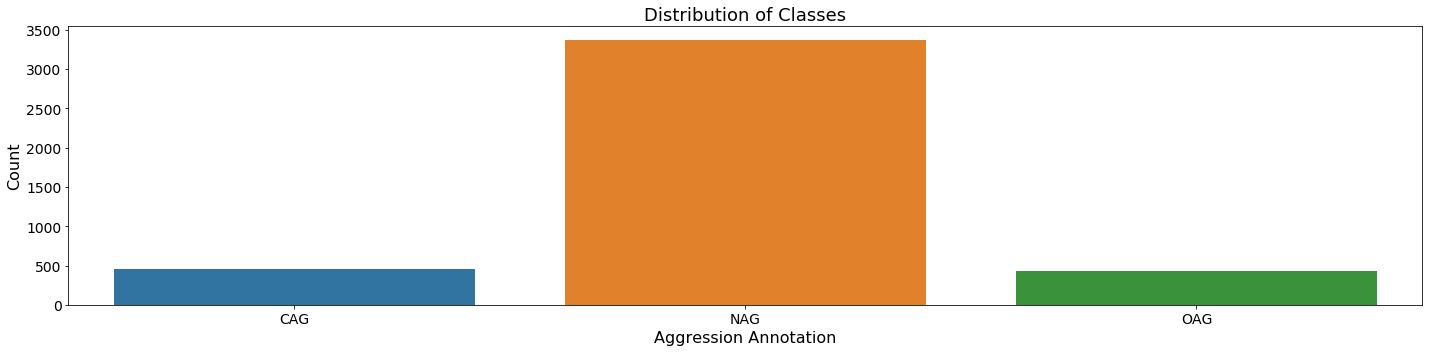

In [7]:
def barplot(df, x, y, title, label, ylabel, dim, orient = "v", ci = False, hue = None):
    
    plt.figure(figsize = dim, facecolor = "white")
    sns.barplot(x = x, y = y, data = df, orient = orient, ci = ci, hue = hue)
    plt.title(f"{title}", size = 18)
    plt.xlabel(f"{label}", size = 16)
    plt.ylabel(f"{ylabel}", size = 16)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.tight_layout();
    

df = (eng_train.set_index(['ID', 'Sub-task A']).count(level='Sub-task A'))

barplot(df = df,
        x = df.index,
        y = "Text",
        title = "Distribution of Classes",
        label = "Aggression Annotation",
        ylabel = "Count",
        dim = (20,5))

eng_train['Sub-task A'].value_counts()

## CLEANING

In [203]:
def POS(df, attribute):
    total_tokens = []
    freq = {}
    for text in df[attribute]:
        doc = nlp(text)
        tokens = []
        for word in doc:
            pos = word.pos_
            if (pos in freq): 
                freq[pos] += 1
            else: 
                freq[pos] = 1
            tokens.append(pos)

        total_tokens.append(tokens)
    pos_df = pd.DataFrame({'POS': list(freq.keys()), 'Frequency':list(freq.values())})
    return pos_df

      POS  Frequency
0     ADJ       6094
1    NOUN      17789
2   SPACE       4237
3       X        714
4   PROPN       5613
5    PRON       5948
6   PUNCT       8710
7    VERB      14942
8    PART       1319
9     ADP       7175
10    DET       7297
11  CCONJ       2453
12    ADV       5643
13   INTJ        733
14    AUX        159
15    NUM        832
16    SYM        273

Part-of-speech tagging counts for combined corpus


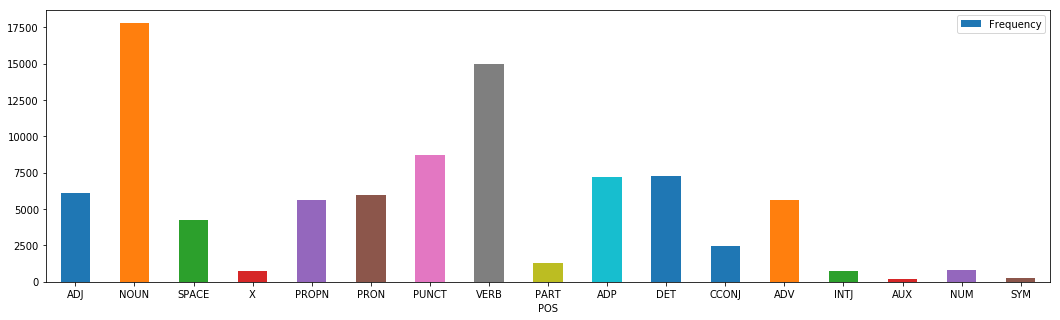

In [206]:
pos_df = POS(eng_train, 'Text')
print(pos_df)
print('\nPart-of-speech tagging counts for combined corpus')
pos_df.plot.bar(x ='POS', y ='Frequency', rot = 0, figsize=(18,5))

In [ ]:
def transliteration_dict(df):
    propn = []
    for text in df['Text']:
        doc = nlp(text)
        tokens = []
        for word in doc:
            pos = word.pos_
            if (pos == 'PROPN'): 
                propn.append(text)
            else: 
                continue
    return propn

In [ ]:
propn = transliteration_dict

In [155]:
def fetch_stopwords(url):
    stop = pd.read_csv(url, sep='\n', header=0, names=['words'])
    stop = stop['words'].values.tolist()
    return stop

In [160]:
# STOPWORDS

# from stopwordsiso import stopwords
# bangla_stopwords = stopwords('bn')

hinglish_stopwords = fetch_stopwords('https://raw.githubusercontent.com/TrigonaMinima/HinglishNLP/master/data/assets/stop_hinglish')
english_stopwords = set(stopwords.words('english') + hinglish_stopwords)
hindi_stopwords = set(fetch_stopwords('https://raw.githubusercontent.com/TrigonaMinima/HinglishNLP/master/data/assets/stop_hindi'))
bangla_stopwords = set(fetch_stopwords('https://raw.githubusercontent.com/rachitsaksena/Multilingual-Agression-Classification/master/bangla%20stop%2Ctxt'))

In [161]:
stop_dict = {'en': english_stopwords,
             'hi': hindi_stopwords,
             'bn': bangla_stopwords}

In [200]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F923"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def unicodeToAscii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

In [201]:
def clean_text(df, lang):
    stop_words = stop_dict[lang]
    df['clean text'] = df['Text']
    for i in range(df.shape[0]):
        sentence = df['Text'].iloc[i]
        sentence = remove_emoji(sentence)
        sentence = re.sub(r"([.!?])", r"\1 ", sentence)
        sentence = re.sub(r'[/(){}\[\]\|@,;:.]', r'', str(sentence))
        sentence = re.sub(r"[^a-z]+", r" ", sentence)
        sentence = ' '.join(word for word in sentence.split() if word not in stop_words and len(word)>2)
        df['clean text'].iloc[i] = sentence
    df["tokenized"] = [tokenize_text(text) for text in df['clean text']]
    return df

In [207]:
clean_text(eng_train, 'en')

,ID,Text,Sub-task A,Sub-task B,clean text,tokenized
0,C45.451,Next part,NAG,NGEN,part,[part]
1,C47.11,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN,iii mllllllm mdxfvb lplppi,"[iii, mllllllm, mdxfvb, lplppi]"
2,C33.79,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN,osm vedio make vedios,"[osm, vedio, make, vedios]"
3,C4.1961,What the fuck was this? I respect shwetabh and...,NAG,NGEN,fuck respect shwetabh watching videos long tim...,"[fuck, respect, shwetabh, watching, videos, lo..."
4,C10.153,Concerned authorities should bring arundathi R...,NAG,NGEN,concerned authorities bring arundathi roy type...,"[concerned, authorities, bring, arundathi, roy..."
5,C10.761,It seems like these people want to be famous n...,NAG,NGEN,famous care die hateful talks,"[famous, care, die, hateful, talks]"
6,C25.6,Best topic for Law Students !,NAG,NGEN,topic law students,"[topic, law, students]"
7,C7.1642,Even when kabir singh was unaware that Preeti ...,CAG,NGEN,kabir singh unaware preeti son ready accept ba...,"[kabir, singh, unaware, preeti, son, ready, ac..."
8,C10.152.1,She is wrong .,NAG,NGEN,wrong,[wrong]
9,C45.217,6001733614,NAG,NGEN,,[]


      POS  Frequency
0    NOUN      18329
1     NUM         20
2    VERB       5874
3     ADJ       5632
4     ADV        901
5       X         98
6    PART         11
7    INTJ        150
8     ADP        193
9    PRON         18
10    DET         34
11  PROPN         24
12  PUNCT         13
13  CCONJ          6

Part-of-speech tagging counts for combined corpus


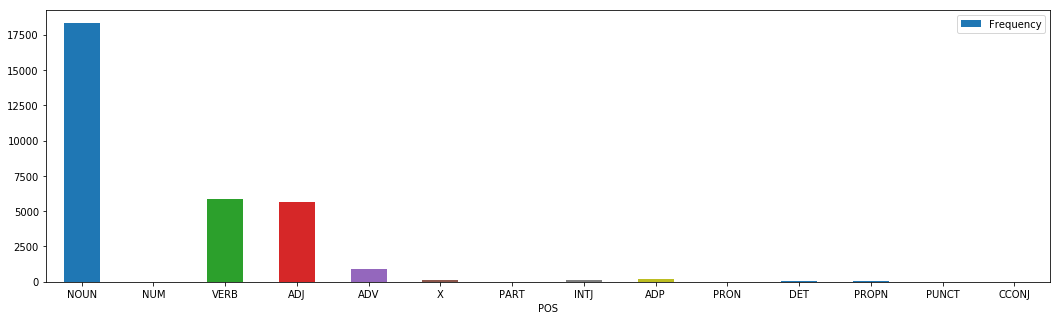

In [208]:
pos_df = POS(eng_train, 'clean text')
print(pos_df)
print('\nPart-of-speech tagging counts for combined corpus')
pos_df.plot.bar(x ='POS', y ='Frequency', rot = 0, figsize=(18,5))

## LANGUAGE TAGGING AMONG CODE MIXED

In [114]:
def lang_tag(df):
    for text in df.Text:
        df['Tag'] = text.split()
        